In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<AxesSubplot:>

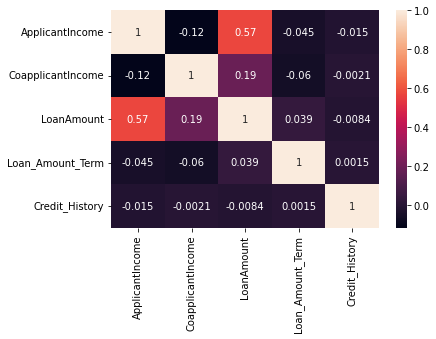

In [4]:
df.corr()
sns.heatmap(df.corr(),annot=True)

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df=df.dropna()

In [8]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
df['Dependents']=df['Dependents'].replace('3+',3)

In [10]:
df['Dependents']=df['Dependents'].astype(int)

In [11]:
df['Credit_History']=df['Credit_History'].astype(int)

In [12]:
df['Property_Area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [13]:
df['Credit_History'].unique()

array([1, 0])

<AxesSubplot:xlabel='Property_Area', ylabel='Credit_History'>

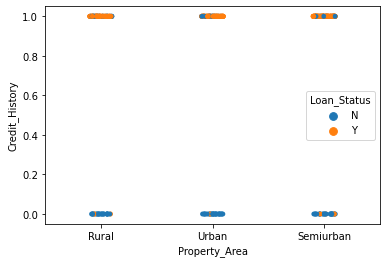

In [14]:
sns.stripplot(data=df,x='Property_Area',y='Credit_History',hue='Loan_Status')

<AxesSubplot:xlabel='Gender', ylabel='count'>

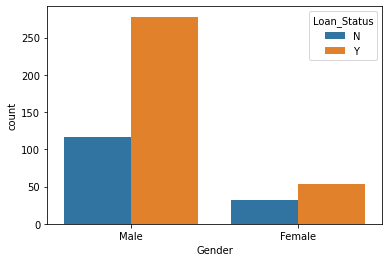

In [15]:
sns.countplot(data=df,x='Gender',hue='Loan_Status')

In [16]:
male_perc=100*df[df['Gender']=='Male']['Gender'].count()/df['Gender'].count()
female_perc=100*df[df['Gender']=='Female']['Gender'].count()/df['Gender'].count()

In [17]:
df[df['Gender']=='Male' ].count()

Loan_ID              394
Gender               394
Married              394
Dependents           394
Education            394
Self_Employed        394
ApplicantIncome      394
CoapplicantIncome    394
LoanAmount           394
Loan_Amount_Term     394
Credit_History       394
Property_Area        394
Loan_Status          394
dtype: int64

In [18]:
df[df['Loan_Status']=='Y'].groupby('Gender')['Loan_Status'].count()

Gender
Female     54
Male      278
Name: Loan_Status, dtype: int64

In [19]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0,Semiurban,N


In [20]:
df.Dependents.unique()

array([1, 0, 2, 3])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

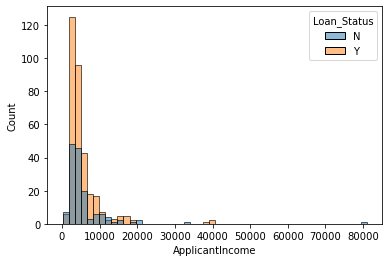

In [21]:
sns.histplot(data=df,x='ApplicantIncome',bins=50,hue='Loan_Status')

<AxesSubplot:xlabel='Education', ylabel='count'>

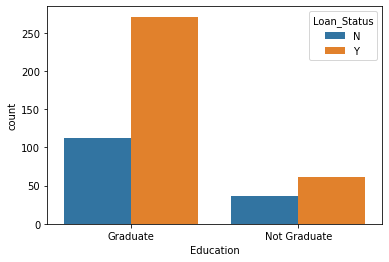

In [22]:
sns.countplot(data=df,x='Education',hue='Loan_Status')

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

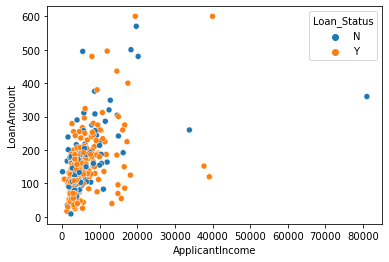

In [23]:
sns.scatterplot(data=df,x='ApplicantIncome',y='LoanAmount',hue='Loan_Status')

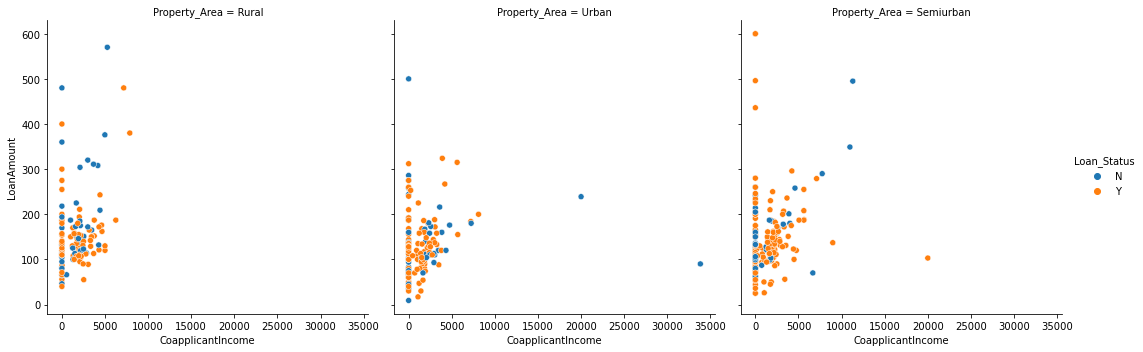

In [24]:
sns.relplot(data=df,x='CoapplicantIncome',y='LoanAmount',hue='Loan_Status',col='Property_Area')

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

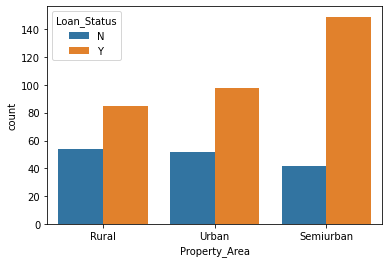

In [25]:
sns.countplot(data=df,x='Property_Area',hue='Loan_Status')

In [26]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [27]:
df.drop(columns='Loan_ID',inplace=True)

In [28]:
df['Loan_Status']=df['Loan_Status'].replace('Y',1)
df['Loan_Status']=df['Loan_Status'].replace('N',0)

In [29]:
n_col=list(df.select_dtypes([np.number]).columns)

In [30]:
#list(set(df.columns))
#n_col

In [31]:
cat_col=list(set(df.columns)-set(n_col))

In [32]:
cat_col

['Gender', 'Education', 'Married', 'Self_Employed', 'Property_Area']

In [33]:
df=pd.get_dummies(data=df,columns=cat_col,drop_first=True)

In [34]:
#df1=df.drop(columns=['Gender','Married','Education','Self_Employed','Property_Area'])

In [35]:
#df=pd.concat([df1,d],axis=1)

In [36]:
df['Loan_Status']

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [37]:
X=df.drop(columns='Loan_Status')
y=df['Loan_Status']

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [40]:
y_p=rf.predict(X_test)

In [41]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score
print(classification_report(Y_test,y_p))

              precision    recall  f1-score   support

           0       0.81      0.46      0.59        28
           1       0.81      0.96      0.88        68

    accuracy                           0.81        96
   macro avg       0.81      0.71      0.73        96
weighted avg       0.81      0.81      0.79        96



<AxesSubplot:>

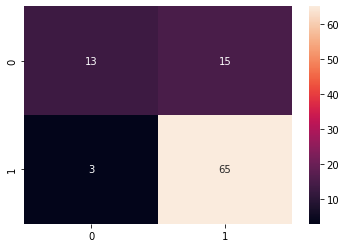

In [42]:
sns.heatmap(confusion_matrix(Y_test,y_p),annot=True)

In [43]:
#Predicted Y (outcome) values for test and training observations
pred_train = rf.predict(X_train)
pred_test = rf.predict(X_test)

#Accuracy
accuracy_train = accuracy_score(Y_train,pred_train)
accuracy_test = accuracy_score(Y_test,pred_test)


#Precision
precision_train = precision_score(Y_train,pred_train)
precision_test = precision_score(Y_test,pred_test)

#Recall
recall_train = recall_score(Y_train,pred_train)
recall_test = recall_score(Y_test,pred_test)

#F1
f1_train = (2 * precision_train * recall_train) / (precision_train + recall_train)
f1_test = (2 * precision_test * recall_test) / (precision_test + recall_test)


print('Accuracy Train:',accuracy_train,'Accuracy Test:',accuracy_test)
print('Precision Train:',precision_train,'Precision Test:',precision_test)
print('Recall Train:',recall_train,'Recall Test:',recall_test)
print('F1 Train:',f1_train,'F1 Test:',f1_test)

Accuracy Train: 1.0 Accuracy Test: 0.8125
Precision Train: 1.0 Precision Test: 0.8125
Recall Train: 1.0 Recall Test: 0.9558823529411765
F1 Train: 1.0 F1 Test: 0.8783783783783784


In [44]:
data=list(zip(df.columns,rf.feature_importances_))

In [45]:
df.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Male',
       'Education_Not Graduate', 'Married_Yes', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [46]:
imp=pd.DataFrame(data,columns=['Feature','Importance'])

In [47]:
imp['Importance'].max()

0.242306256052146

In [48]:
imp.loc[imp['Importance']==imp['Importance'].max()]

,Feature,Importance
5,Credit_History,0.242306


In [49]:
#sns.heatmap(imp.Importance)

In [50]:
df.Dependents=df.Dependents.astype(int)